In [2]:
import plot_top as pltt
""" mostly plotting results for rocky planet evolution + topographies """
%matplotlib inline
import numpy as np
import parameters as p
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from collections.abc import Iterable
import collections
import six
from scipy import interpolate
import pandas as pd
from IPython.display import display, Math
import random as rand
import terrestrialplanet as tp
import thermal as therm
import topography as top
import rheology as rh
import inputs as ins
from mpl_tools import colorize
import matplotlib
from matplotlib.font_manager import FontProperties
from matplotlib import rc

# fig_path = '/space/cmg76/figs/' # office
fig_path = 'figs/' # laptop#
goodfig_path = 'latex/report-firstyr/figs/'

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
/home/claire/Works/exo-top/plot_top.py:579: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
/home/claire/Works/exo-top/plot_top.py:579: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
/home/claire/Works/exo-top/plot_top.py:579: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
/home/claire/Works/exo-top/plot_top.py:579: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


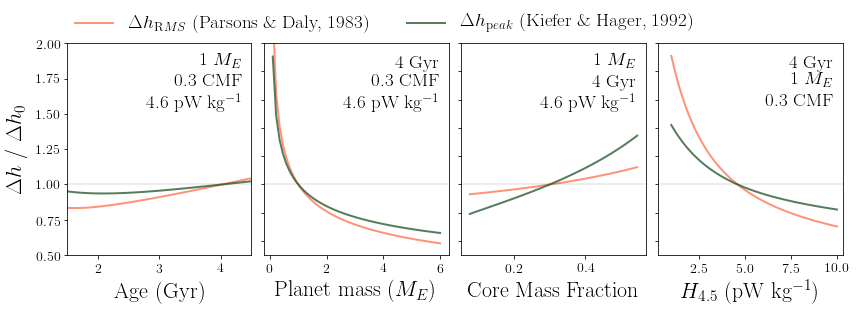

In [4]:
def plot_h_relative(plots_save=False, defaults='Earthbaseline', fname='fig', fig_path='figs/', wspace=None, 
                    snap=4.5,
                    fig=None, axes=None, h_param='dyn_top_stress', legend=False, legsize=12, **plot_kwargs):
    pl_kwargs =  eval('ins.'+defaults+'_in') 
    if axes is None:
        fig, axes = plt.subplots(1, 4, figsize=(12,4))
    
    pl_baseline = pltt.bulk_planets(N=1, name='M_p', mini=1*p.M_E, maxi=1*p.M_E, visc_type='KW', 
                                t_eval=None, random=False, T_m0=1750, T_c0=2250, D_l0=100e3, tf=4.5, 
                                **pl_kwargs)[0]
    h_baseline = eval('pl_baseline.'+h_param)
    it = min(enumerate(pl_baseline.t), key=lambda x: abs(snap - x[1]*p.sec2Gyr))[0] # get time index nearest to desired snap given in Gyr
                    
#     print('\n \n h_param', h_param)
#     print(h_baseline[0], h_baseline[-1], 'm')

    # time/age variation
    fig, ax = pltt.plot_vs_x(legend=legend, legsize=legsize,
                          lplanets=pl_baseline, xname={'t':('Age (Gyr)', p.sec2Gyr)}, set_xlim=True,
                          ynames={h_param:('$\Delta h$ / $\Delta h_0$  ', h_baseline[it]**-1)}, 
                          plots_save=False, fig=fig, axes=axes[0], xmin=1.5, xmax=4.5, **plot_kwargs)
    ax.axhline(y=1, lw=0.1, c='k', alpha=0.7)
    if legend:
        ax.text(0.95, 0.95,'{:1.0f}'.format(pl_baseline.M_p/p.M_E)+' $M_E$ \n 0.3 CMF \n 4.6 pW kg$^{-1}$', 
                fontsize=legsize,
                 horizontalalignment='right',
                 verticalalignment='top',
                 transform = ax.transAxes)

    # mass variation
    planets_mass = pltt.bulk_planets(N=50, name='M_p', mini=0.1*p.M_E, maxi=6*p.M_E, visc_type='KW', 
                                t_eval=pl_baseline.t, random=False, T_m0=1750, T_c0=2250, D_l0=100e3, tf=4.5, 
                                **pl_kwargs)
    fig, ax = pltt.plot_vs_x(
                          lplanets=planets_mass, xname={'M_p':('Planet mass ($M_E$)', p.M_E**-1)}, 
                          ynames={h_param:('', h_baseline**-1)}, snap=snap,
                          plots_save=False, fig=fig, axes=axes[1], ylabel=False, **plot_kwargs)
    ax.axhline(y=1, lw=0.1, c='k', alpha=0.7)
    if legend:
        ax.text(0.95, 0.95,str(snap)+' Gyr \n 0.3 CMF \n 4.6 pW kg$^{-1}$', fontsize=legsize,
                 horizontalalignment='right',
                 verticalalignment='top',
                 transform = ax.transAxes)
    
    
    # CMF variation
    planets_CMF = pltt.bulk_planets(N=50, name='CMF', mini=0.07829, maxi=0.544,  visc_type='KW', 
                                t_eval=pl_baseline.t, random=False,  **pl_kwargs)
    fig, ax = pltt.plot_vs_x(
                          lplanets=planets_CMF, xname={'CMF':('Core Mass Fraction',1)}, 
                          ynames={h_param:('', h_baseline**-1)}, snap=snap,
                          plots_save=False, fig=fig, axes=axes[2], ylabel=False, **plot_kwargs)
    ax.axhline(y=1, lw=0.1, c='k', alpha=0.7)
    if legend:
        ax.text(0.95, 0.95,'{:1.0f}'.format(pl_baseline.M_p/p.M_E)+' $M_E$ \n'+str(snap)+' Gyr \n 4.6 pW kg$^{-1}$', fontsize=legsize,
                 horizontalalignment='right',
                 verticalalignment='top',
                 transform = ax.transAxes)
    
    
    
    # H0 variation
    planets_H0 = pltt.bulk_planets(N=50, name='H_0', mini=1e-12, maxi=10e-12, visc_type='KW', 
                                t_eval=pl_baseline.t, random=False, T_m0=1750, T_c0=2250, D_l0=100e3, tf=4.5, 
                                **pl_kwargs)
    fig, ax = pltt.plot_vs_x(xmin=0.3, xmax=10.3, set_xlim=True,
                          lplanets=planets_H0, xname={'H_0':('$H_{4.5}$ (pW kg$^{-1}$)', 1e12)}, 
                          ynames={h_param:('', h_baseline**-1)}, snap=snap, 
                          plots_save=False, fig=fig, axes=axes[3], ylabel=False, **plot_kwargs)
    ax.axhline(y=1, lw=0.1, c='k', alpha=0.7)
    if legend:
        ax.text(0.95, 0.95,str(snap)+' Gyr \n'+'{:1.0f}'.format(pl_baseline.M_p/p.M_E)+' $M_E$ \n 0.3 CMF', fontsize=legsize,
                 horizontalalignment='right',
                 verticalalignment='top',
                 transform = ax.transAxes)
        
    plt.subplots_adjust(wspace=wspace)
    if plots_save:
        plt.savefig(fig_path+fname+'.pdf', bbox_inches='tight') 
    return fig, axes
    
def plot_h_relative_cmp(defaults='Earthbaseline', plots_save=False, fig_path='figs/', fname='fig', 
                        models=['dyn_top_rms','dyn_top_KH','dyn_top_stress'],
                        labels=['Parsons \& Daly (1983)','Kiefer \& Hager (1992)',
                                r'$\Delta h \sim \alpha \Delta T_{rh} \delta_{bl}$'],
                        c=['xkcd:neon red','xkcd:bright yellow','xkcd:golden yellow'],
                        fig=None, axes=None, **kwargs):
    legend=False
    for ii, h_param in enumerate(models):
        if ii==len(models)-1:
            legend=True
        fig, axes = plot_h_relative(defaults=defaults, fig=fig, axes=axes,
                            h_param=models[ii], label_l=labels[ii], 
                            c=c[ii], legend=legend, **kwargs)
    if plots_save:
        fig.savefig(fig_path+fname+'.pdf', bbox_inches='tight') 
    return fig, axes
#xkcd:tea

fig, axes=plot_h_relative_cmp(snap=4, alpha=0.8, wspace=0.07, legsize=19, ticksize=14, labelsize=22, 
                              ymin=0.5, ymax=2, lw=2, #legtitle=r'\textbf{\textit{Model}}', 
                              labelpad=7, legendtop=True,
                             plots_save=True, fname='relative_h', fig_path=goodfig_path,
                             models=['dyn_top_rms','dyn_top_KH'],
                             labels=['$\Delta h_{\mathrm RMS}$ (Parsons \& Daly, 1983)',
                                     '$\Delta h_{\mathrm peak}$ (Kiefer \& Hager, 1992)',
                                r'$\Delta h \sim \alpha \Delta T_{rh} \delta_{bl}$'],
                        c=['xkcd:melon','xkcd:pine'],)

# variation with surface T_eq is on the order of 10 ppm

In [ ]:
# ocean volume - as baseline planet use Huang Venus case 15
import pyshtools
def peak_from_spectrum(power, norm='4pi', lmax=40, n=1):
    ii=0
    h_peak = []
    while ii<n:
        coeffs_global = pyshtools.SHCoeffs.from_random(power, normalization=norm)
        topo = coeffs_global.expand(lmax=lmax)
        h_peak.append(np.max(topo.data)) # in m
        ii+=1
    return np.mean(h_peak)

def load_spectrum(fpath='', fname=''):
    df = pd.read_csv(fpath+fname, header=None, names=['l', 'S_l'], index_col=False)
    degrees = df['l']
    power = df['S_l']
    # todo : find nearest l for imperfect digitization
    return power

def ocean_vol(h_peak, R_p=p.R_E):#6051.88e3):
    EO = 1.35e9 * 1000**3
    vol = 4/3*np.pi*((R_p + h_peak)**3 - R_p**3)
    return vol/EO

def scale_spectrum(phi0, pl, pl0, h_func=None, snap=4.5):
    # phi0 : digitized baseline spectrum
    it = min(enumerate(pl.t), key=lambda x: abs(snap - x[1]*p.sec2Gyr))[0] # get time index nearest to desired snap given in Gyr
                    
    if h_func is None:
        ratio = (pl.d_m * pl.T_m**2 * pl.Ra_i**(-1/3)) / (pl0.d_m * pl0.T_m**2 * pl0.Ra_i**(-1/3)) # = phi / phi0
    sqrtphi = np.sqrt(phi0)*ratio[it]
    return sqrtphi**2

def oceans_plot(n_stats=1000, wspace=0.5, fig_path='figs/', snap=4.5, legsize=16, **plot_kwargs):

    ident = 'Venusbaseline'
    pl0 = pltt.build_planet(ident='Venusbaseline', run_args=None, 
                       update_args={'k_m':3.206, 'alpha_m':2e-5, 'T_s':730},)
    pl_list = pltt.bulk_planets(N=20, name='M_p', mini=0.01*p.M_E, maxi=6*p.M_E, like=ident, 
                           update_kwargs={'k_m':3.206, 'alpha_m':2e-5, 'T_s':730},
                           t_eval=pl0.t, random=False)
    d_ocean_Earth = 3.7e3
    phi0 = load_spectrum(fpath = 'benchmarks/wei_Venus/',fname = 'model_power_m2_b.csv')
    h_peak0 = peak_from_spectrum(phi0, n=n_stats)
    V_ocean0 = ocean_vol(h_peak0)
    pl0.max_ocean = V_ocean0
    print('V_ocean0 =',V_ocean0)

    for pl in pl_list:
        phi = scale_spectrum(phi0, pl, pl0)
        h_peak = peak_from_spectrum(phi, n=n_stats)
    #     print('h_peak', h_peak)
        answer = ocean_vol(h_peak, R_p=pl.R_p)
    #     print('ocean_vol', answer)
        pl.max_ocean = answer # in EO

    fig, axes = plt.subplots(1, 3, figsize=(10, 4))
    fig.suptitle('Ocean volume needed to submerge land', fontsize=24, y=1.1)

    fig, ax = pltt.plot_vs_x(set_xlim=False,fig=fig, axes=axes[1],
                          lplanets=pl_list, ncol=1, ylabel=False, 
                          xname={'M_p':(r'Planet mass ($M_{Ve}$)', 4.867e24**-1)}, 
                          ynames={'max_ocean':(r'$V_{max}/V_{max, Ve}$', V_ocean0**-1)}, 
                          snap=snap, **plot_kwargs)


    ax.axhline(y=1, lw=0.5, c='k', alpha=0.4)
    ax.text(0.05, 0.95,str(snap)+' Gyr \n 4.6 pW kg$^{-1}$', fontsize=legsize,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax.transAxes)


    planets_H0 = pltt.bulk_planets(N=20, name='H_0', mini=1e-12, maxi=10e-12, like=ident, 
                           update_kwargs={'k_m':3.206, 'alpha_m':2e-5, 'T_s':730},
                           t_eval=pl0.t, random=False)

    for pl in planets_H0:
        phi = scale_spectrum(phi0, pl, pl0)
        h_peak = peak_from_spectrum(phi, n=n_stats)
    #     print('h_peak', h_peak)
        answer = ocean_vol(h_peak, R_p=pl.R_p)
    #     print('ocean_vol', answer)
        pl.max_ocean = answer # in EO

    fig, ax = pltt.plot_vs_x(#xmin=0.3, xmax=10.3, set_xlim=True,
                          lplanets=planets_H0, xname={'H_0':('$H_{4.5}$ (pW kg$^{-1}$)', 1e12)}, 
                          ynames={'max_ocean':(r'$V_{max}/V_{max, Ve}$', V_ocean0**-1)}, 
                          snap=snap, ylabel=False, 
                          fig=fig, axes=axes[2], **plot_kwargs)

    ax.axhline(y=1, lw=0.5, c='k', alpha=0.4)
    ax.text(0.05, 0.95,str(snap)+' Gyr \n'+'{:1.0f}'.format(pl0.M_p/4.867e24)+' $M_{Ve}$', fontsize=legsize,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax.transAxes)


    # plt.savefig(fig_path+'ocean_vol.pdf', bbox_inches='tight') 

    pl = pl_list[3]
    pl0 = tp.TerrestrialPlanet(d_m=pl.d_m[-1], T_m=pl.T_m[-1], Ra_i=pl.Ra_i[-1])
    times = np.linspace(0.1, 4.5, num=20)
    ocean = []
    for snap in times:
        phi = scale_spectrum(phi0, pl, pl0, snap=snap)
        h_peak = peak_from_spectrum(phi, n=n_stats)
        answer = ocean_vol(h_peak, R_p=pl.R_p)
    #     print('ocean_vol', answer)
        ocean.append(answer) # in EO
    pl.max_ocean = np.array(ocean)
    pl.t = times
    fig, ax = pltt.plot_vs_x(set_xlim=True, xmin=1.5, xmax=4.5, 
                        fig=fig, axes=axes[0],
                          lplanets=pl, ncol=1,
                          xname={'t':(r'Age (Gyr)', 1)}, 
                          ynames={'max_ocean':(r'$V_{max}$ / $V_{max, 0}$', pl.max_ocean[-1]**-1)}, **plot_kwargs)
    ax.axhline(y=1, lw=0.5, c='k', alpha=0.4)
    ax.text(0.05, 0.95,'{:1.0f}'.format(pl0.M_p/4.867e24)+' $M_{Ve}$ \n 4.6 pW kg$^{-1}$', fontsize=legsize,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax.transAxes)
    
    
    plt.subplots_adjust(wspace=wspace)
    plt.savefig(fig_path+'ocean_vol.pdf', bbox_inches='tight') 

oceans_plot(n_stats=1000, labelsize=23, ticksize=16, wspace=0.07, fig_path=goodfig_path, legsize=19, 
            c='xkcd:aqua green', alpha=0.9, lw=3, ymin=0.3, ymax=1.8, labelpad=10, set_ylim=True)